Para implementar ejecute

  git clone https://github.com/lopezdar222/herramientas_big_data

  cd herramientas_big_data
  
  sudo docker-compose -f docker-compose-vX.yml up -d


    1) HDFS

Se puede utilizar el entorno docker-compose-v1.yml

  sudo docker-compose -f docker-compose-v1.yml up -d

Copiar los archivos ubicados en la carpeta Datasets, dentro del contenedor "namenode"

creamos la carpeta dentro del contenedor namenode

  sudo docker exec -it namenode bash

  cd home

  mkdir Datasets

  exit

ahora copiamos los archivos a la ruta que creamos desde la carpeta clonada
(podes saber la ruta de donde esta el archivo parandote en el directorio donde se encuentra y poniendo "pwd" para ue te muestre la ruta)

la ruta es:

/home/ubuntu/DS-M4-Herramientas_Big_Data

Ahora procedemos si a copiar los archivos dentro del contenedor

sudo docker cp /home/ubuntu/DS-M4-Herramientas_Big_Data/ * namenode:/home/Datasets/

Ubicarse en el contenedor "namenode" :

sudo docker exec -it namenode bash

Ahora creamos la carpeta dentro del HDFS que se llama /data

hdfs dfs -mkdir -p /data

chequeamos que la carpeta se creo

hdfs dfs -ls /

copiamos los archivos

hdfs dfs -put /home/Datasets/* /data

cheuqeamos nuevamente que esten copiados

hdfs dfs -ls /data

Encontrar los valores de tamaño de bloque y factor de réplica respectivamente entre otras configuraciones del sistema Hadoop.

 http://192.168.0.245:9870/conf

#valores de tamaño de bloque 

 #dfs.blocksize
 #134217728

#valores de factor de réplica

 #dfs.replication
 #3

 ![Captura de pantalla 2023-10-12 171433.png](<attachment:Captura de pantalla 2023-10-12 171433.png>)

 ![Captura de pantalla 2023-10-12 171544.png](<attachment:Captura de pantalla 2023-10-12 171544.png>)
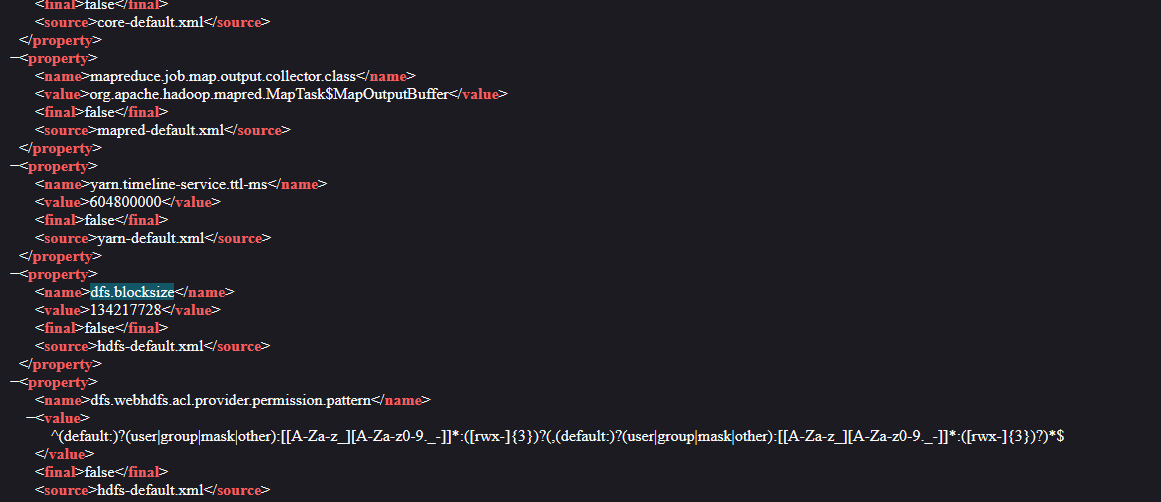
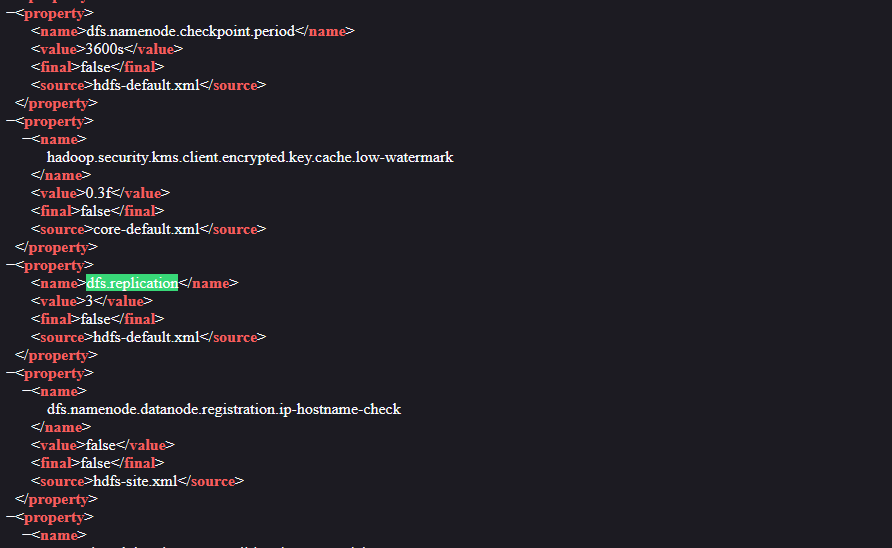

    2) Hive

Se puede utilizar el entorno docker-compose-v2.yml

sudo docker-compose -f docker-compose-v2.yml up -d

Crear tablas en Hive, a partir de los csv ingestados en HDFS.

Para esto, se puede ubicar dentro del contenedor correspondiente al servidor de Hive, y ejecutar desdea allí los scripts necesarios

copiamos los archivos dentro del contenedor

sudo docker cp /home/ubuntu/DS-M4-Herramientas_Big_Data/Paso02.hql hive-server:/

Ejecutamos el contenedor y entramos a Hive

sudo docker exec -it hive-server bash

y dentro corremos parados en el raiz:

hive -f /Paso02.hql

en mi caso al parecer habiar un problema con el archivo asi que lo revise y al no poder solucionarlo termine creando las tablas corriendolas de una en una.

referencia en el archivo : [Creacion de las Tablas sin script](./capturas%20y%20archivos%20del%20proyecto%20integrador/creacion%20y%20de%20las%20tablas%20punto%202%20sin%20script.txt)

SHOW DATABASES;

USE integrador;

SHOW TABLES;

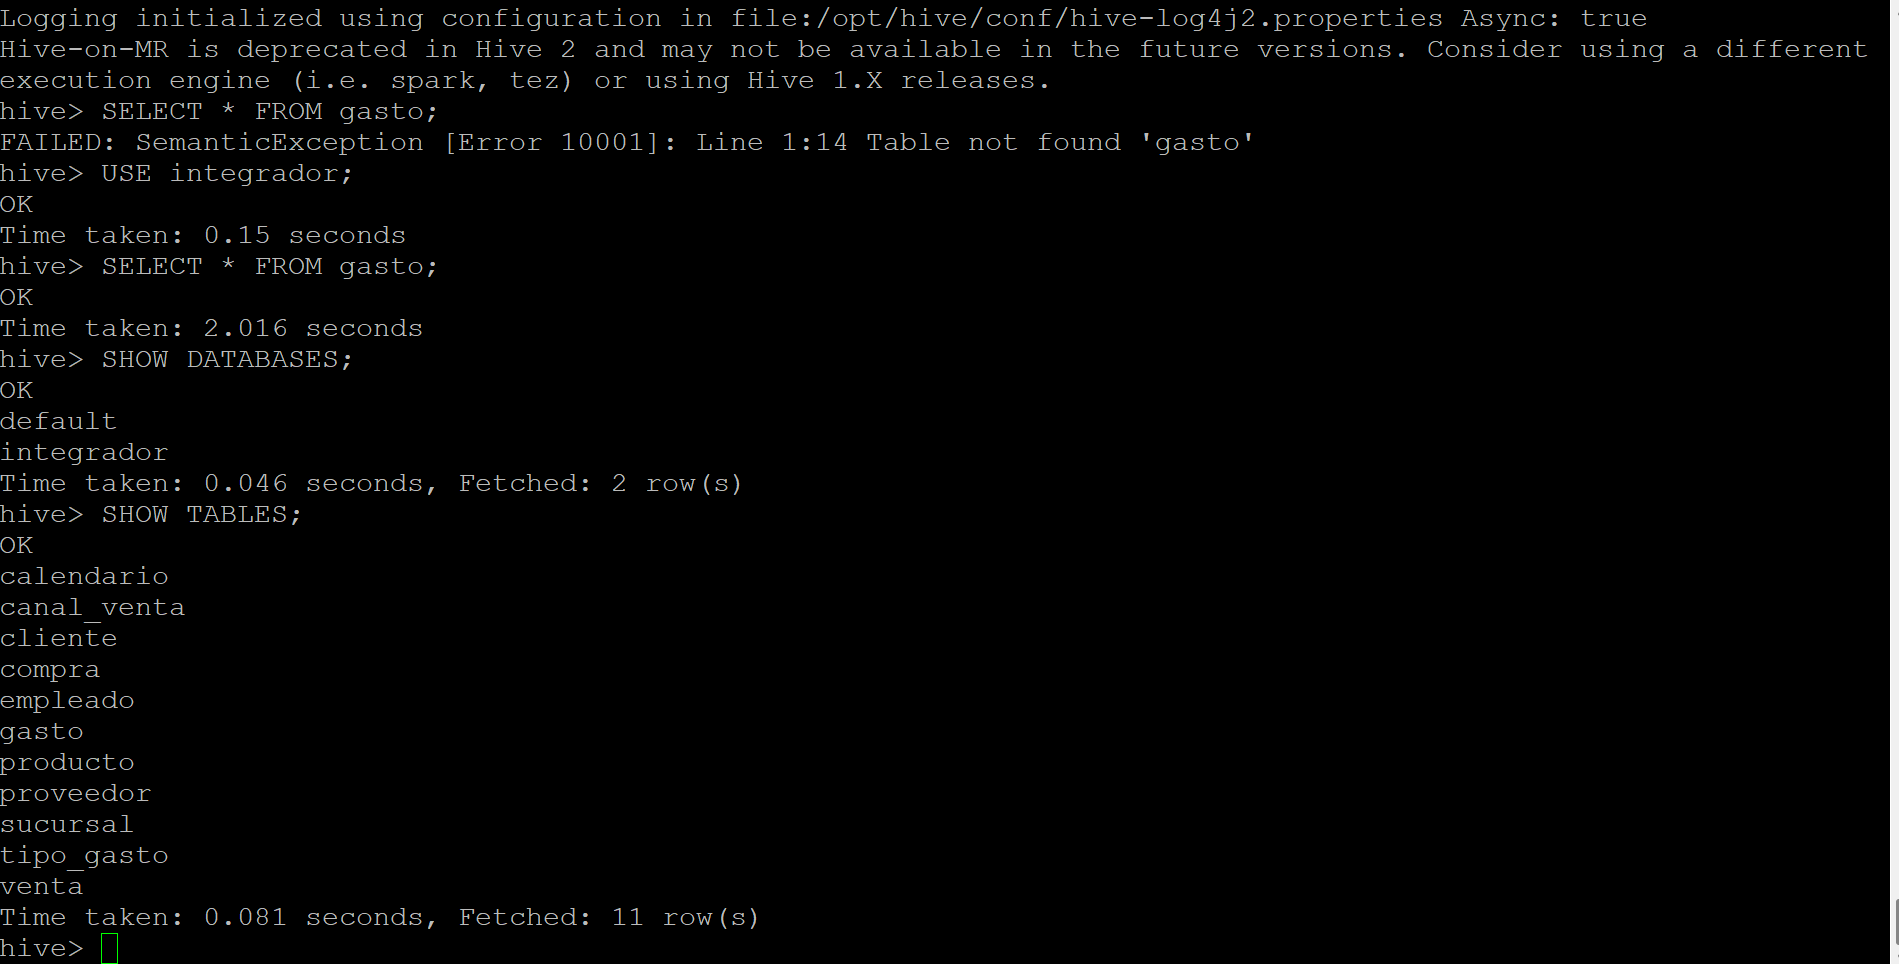

    3) Formatos de Almacenamiento

Las tablas creadas en el punto 2 a partir de archivos en formato csv, deben ser almacenadas en formato Parquet + Snappy. Tener en cuenta además de aplicar particiones para alguna de las tablas.

referencia en el archivo : [Creacion de las Tablas sin script](./capturas%20y%20archivos%20del%20proyecto%20integrador/creacion_y_de_las_tablas_punto_3_sin_script.txt)

log del archivo con las tablas creadas y consultas a las mismas:

referencia en el archivo : [LOG](./capturas%20y%20archivos%20del%20proyecto%20integrador/putty_Actividad3)

    4) SQL

La mejora en la velocidad de consulta que puede proporcionar un índice tiene el costo del procesamiento adicional para crear el índice y el espacio en disco para almacenar las referencias del índice. Se recomienda que los índices se basen en las columnas que utiliza en las condiciones de filtrado. El índice en la tabla puede degradar su rendimiento en caso de que no los esté utilizando. Crear índices en alguna de las tablas cargadas y probar los resultados:

PRIMERO hacemos las pruebas de creacion de indices, rebuild y borrado de los mismos

referencia en el archivo : [indices](./capturas%20y%20archivos%20del%20proyecto%20integrador/creacion%20de%20indices%20punto%204%20sql.txt)

probamos una query sin los indices creados:

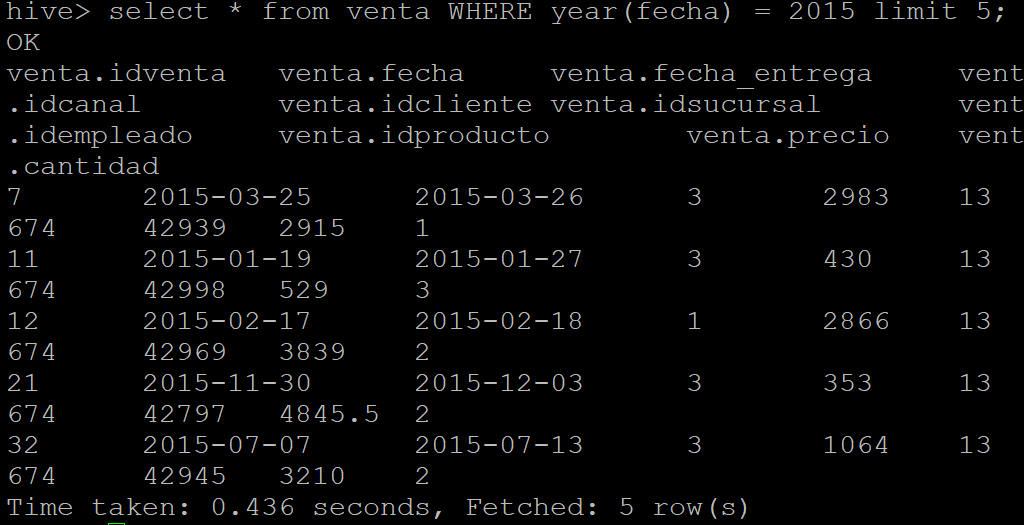

creamos los indices para la tabla:

CREATE INDEX index_venta ON TABLE venta(idventa)
AS 'org.apache.hadoop.hive.ql.index.compact.CompactIndexHandler'
WITH DEFERRED REBUILD;

ahora probamos la misma query pero con el indice creado:

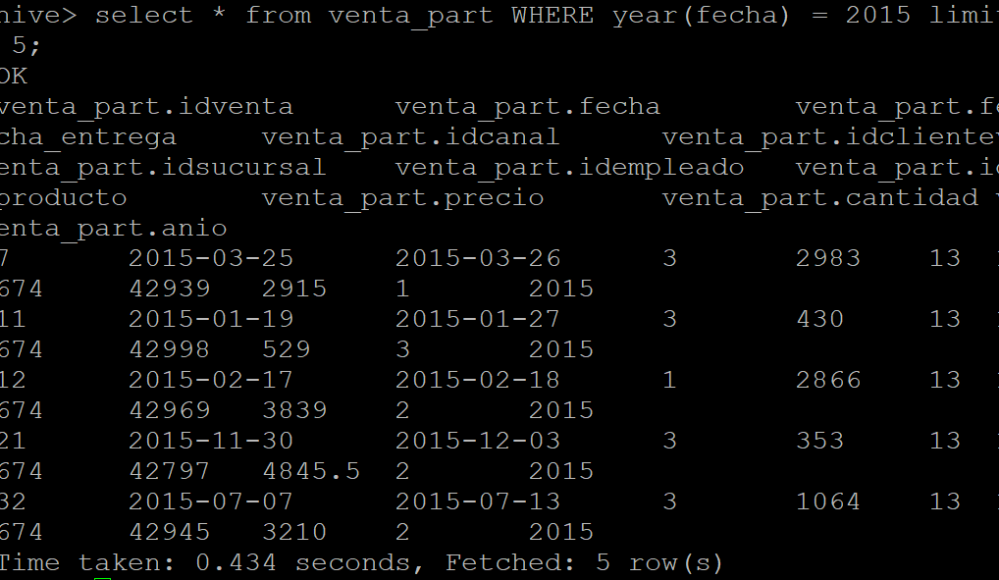

    5) No-SQL

Se puede utilizar el entorno docker-compose-v3.yml

se cambio el docker-compose-v3.yml  que por problemas de espacio no me lo cargaba ya que el peso de las imagenees no me dejaban cargarlo.

para solucionar esto borrramos la descarga de la imagen zeppelin, que era la mas pesada con 4.11GB.

y se guardo con el nombre docker-compose-v3-2.yml

lo corrimos:

sudo docker-compose -f docker-compose-v3-2.yml up -d

    1) HBase:

ahora que corrimos el docker-compose y los contenedores estan online entramos a HBase

sudo docker exec -it hbase-master hbase shell

1- sudo docker exec -it hbase-master hbase shell

create 'personal','personal_data'

list 'personal'

put 'personal',1,'personal_data:name','Juan'

put 'personal',1,'personal_data:city','Córdoba'

put 'personal',1,'personal_data:age','25'

put 'personal',2,'personal_data:name','Franco'

put 'personal',2,'personal_data:city','Lima'

put 'personal',2,'personal_data:age','32'

put 'personal',3,'personal_data:name','Ivan'

put 'personal',3,'personal_data:age','34'

put 'personal',4,'personal_data:name','Eliecer'

put 'personal',4,'personal_data:city','Caracas'

get 'personal','4'

2-En el namenode del cluster:

hdfs dfs -put personal.csv /hbase/data/personal.csv

3-sudo docker exec -it hbase-master bash
		
hbase org.apache.hadoop.hbase.mapreduce.ImportTsv -Dimporttsv.separator=',' -Dimporttsv.columns=HBASE_ROW_KEY,personal_data:name,personal_data:city,personal_data:age personal hdfs://namenode:9000/hbase/data/personal.csv

hbase shell

scan 'personal'

create 'album','label','image'

put 'album','label1','label:size','10'

put 'album','label1','label:color','255:255:255'

put 'album','label1','label:text','Family album'

put 'album','label1','image:name','holiday'

put 'album','label1','image:source','/tmp/pic1.jpg'

get 'album','label1'


referencia en el archivo : [HBASE master pagina ](./capturas%20y%20archivos%20del%20proyecto%20integrador/HBase%20Master_%20hbase-master,16000,1697568604155.html)

    2) MongoDB

1) 	sudo docker cp iris.csv mongodb:/data/iris.csv
		  sudo docker cp iris.json mongodb:/data/iris.json

2)  sudo docker exec -it mongodb bash

3) 	mongoimport /data/iris.csv --type csv --headerline -d dataprueba -c iris_csv
		  mongoimport --db dataprueba --collection iris_json --file /data/iris.json --jsonArray

4) mongosh
		use dataprueba
		show collections
		db.iris_csv.find()
		db.iris_json.find()
	
5) 	mongoexport --db dataprueba --collection iris_csv --fields sepal_length,sepal_width,petal_length,petal_width,species --type=csv --out /data/iris_export.csv
		mongoexport --db dataprueba --collection iris_json --fields sepal_length,sepal_width,petal_length,petal_width,species --type=json --out /data/iris_export.json
				
6) 	Descargar desde https://search.maven.org/search?q=g:org.mongodb.mongo-hadoop los jar:
		https://search.maven.org/search?q=a:mongo-hadoop-hive
		https://search.maven.org/search?q=a:mongo-hadoop-spark
		
		sudo docker cp mongo-hadoop-hive-2.0.2.jar hive-server:/opt/hive/lib/mongo-hadoop-hive-2.0.2.jar
		sudo docker cp mongo-hadoop-core-2.0.2.jar hive-server:/opt/hive/lib/mongo-hadoop-core-2.0.2.jar
		sudo docker cp mongo-hadoop-spark-2.0.2.jar hive-server:/opt/hive/lib/mongo-hadoop-spark-2.0.2.jar
		sudo docker cp mongo-java-driver-3.12.11.jar hive-server:/opt/hive/lib/mongo-java-driver-3.12.11.jar
		
7) 	sudo docker cp iris.hql hive-server:/opt/iris.hql
		sudo docker exec -it hive-server bash

8) 	hiveserver2
		chmod 777 iris.hql
		hive -f iris.hql


corriendo este ultimo paso dio un error de SerDe que no pudimos solucionar:

root@a4a19a60d244:/opt# hive -f iris.hql

SLF4J: Class path contains multiple SLF4J bindings.

SLF4J: Found binding in [jar:file:/opt/hive/lib/log4j-slf4j-impl-2.6.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]

SLF4J: Found binding in [jar:file:/opt/hadoop-2.7.4/share/hadoop/common/lib/slf4j-log4j12-1.7.10.jar!/org/slf4j/impl/StaticLoggerBinder.class]

SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.

SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]

Logging initialized using configuration in file:/opt/hive/conf/hive-log4j2.properties Async: true

Added [/tmp/b06f5ba5-bfb9-41ab-8315-7461e160f865_resources/mongo-java-driver-3.12.11.jar] to class path
Added resources: [hdfs://namenode:9000/tmp/udfs/mongo-java-driver-3.12.11.jar]

Added [/tmp/b06f5ba5-bfb9-41ab-8315-7461e160f865_resources/mongo-hadoop-core-2.0.2.jar] to class path

Added resources: [hdfs://namenode:9000/tmp/udfs/mongo-hadoop-core-2.0.2.jar]

Added [/tmp/b06f5ba5-bfb9-41ab-8315-7461e160f865_resources/mongo-hadoop-hive-2.0.2.jar] to class path

Added resources: [hdfs://namenode:9000/tmp/udfs/mongo-hadoop-hive-2.0.2.jar]

FAILED: Execution Error, return code 1 from org.apache.hadoop.hive.ql.exec.DDLTask. org/apache/hadoop/hive/serde2/SerDe

    3) Neo4J

corremos para entrar al contenedor:

sudo docker exec -it neo4j bash

para entrar a la aplicacion tenemos que hacer:
escribir dentro del contenedor:

cypher-shell

y el user y pass es:

usuario : neo4j
contraseña :zeppelin

una vez dentro procedemos a correr:

	CREATE (a:Location {name: 'A'}),
			   (b:Location {name: 'B'}),
			   (c:Location {name: 'C'}),
			   (d:Location {name: 'D'}),
			   (e:Location {name: 'E'}),
			   (f:Location {name: 'F'}),
			   (a)-[:ROAD {cost: 50}]->(b),
			   (b)-[:ROAD {cost: 50}]->(a),
			   (a)-[:ROAD {cost: 50}]->(c),
			   (c)-[:ROAD {cost: 50}]->(a),
			   (a)-[:ROAD {cost: 100}]->(d),
			   (d)-[:ROAD {cost: 100}]->(a),
			   (b)-[:ROAD {cost: 40}]->(d),
			   (d)-[:ROAD {cost: 40}]->(b),
			   (c)-[:ROAD {cost: 40}]->(d),
			   (d)-[:ROAD {cost: 40}]->(c),
			   (c)-[:ROAD {cost: 80}]->(e),
			   (e)-[:ROAD {cost: 80}]->(c),
			   (d)-[:ROAD {cost: 30}]->(e),
			   (e)-[:ROAD {cost: 30}]->(d),
			   (d)-[:ROAD {cost: 80}]->(f),
			   (f)-[:ROAD {cost: 80}]->(d),
			   (e)-[:ROAD {cost: 40}]->(f),
			   (f)-[:ROAD {cost: 40}]->(e);
			   
		CALL gds.graph.project(
			'miGrafo',
			'Location',
			'ROAD',
			{
				relationshipProperties: 'cost'
			}
		)

		MATCH (l:Location) RETURN l
					
		MATCH (source:Location {name: 'A'}), (target:Location {name: 'E'})
		CALL gds.shortestPath.dijkstra.write.estimate('miGrafo', {
			sourceNode: source,
			targetNode: target,
			relationshipWeightProperty: 'cost',
			writeRelationshipType: 'PATH'
		})
		YIELD nodeCount, relationshipCount, bytesMin, bytesMax, requiredMemory
		RETURN nodeCount, relationshipCount, bytesMin, bytesMax, requiredMemory

		MATCH (source:Location {name: 'A'}), (target:Location {name: 'E'})
		CALL gds.shortestPath.dijkstra.stream('miGrafo', {
			sourceNode: source,
			targetNode: target,
			relationshipWeightProperty: 'cost'
		})
		YIELD index, sourceNode, targetNode, totalCost, nodeIds, costs, path
		RETURN
			index,
			gds.util.asNode(sourceNode).name AS sourceNodeName,
			gds.util.asNode(targetNode).name AS targetNodeName,
			totalCost,
			[nodeId IN nodeIds | gds.util.asNode(nodeId).name] AS nodeNames,
			costs,
			nodes(path) as path
		ORDER BY index

MATCH (n:Location {name: 'A'})
		CALL gds.alpha.spanningTree.minimum.write('miGrafo', {
		  startNodeId: id(n),
		  relationshipWeightProperty: 'cost',
		  writeProperty: 'MINST',
		  weightWriteProperty: 'writeCost'
		})
		YIELD preProcessingMillis, computeMillis, writeMillis, effectiveNodeCount
		RETURN preProcessingMillis, computeMillis, writeMillis, effectiveNodeCount;		

		MATCH path = (n:Location {name: 'A'})-[:MINST*]-()
		WITH relationships(path) AS rels
		UNWIND rels AS rel
		WITH DISTINCT rel AS rel
		RETURN startNode(rel).name AS source, endNode(rel).name AS destination, rel.writeCost AS cost
		
		MATCH (n) DETACH DELETE n

		sudo docker cp producto.csv neo4j:/var/lib/neo4j/import/producto.csv
		sudo docker cp tipo_producto.csv neo4j:/var/lib/neo4j/import/tipo_producto.csv
		sudo docker cp cliente.csv neo4j:/var/lib/neo4j/import/cliente.csv
		sudo docker cp venta.csv neo4j:/var/lib/neo4j/import/venta.csv
		
		Ver Archivo "ejemploNeo4J.txt"

referencia en el archivo : [1](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5.png)

referencia en el archivo : [2](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-2.png)

referencia en el archivo : [3](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-3.png)

referencia en el archivo : [4](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-5.png)

referencia en el archivo : [5](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-6.png)

referencia en el archivo : [6](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-7.png)

referencia en el archivo : [7](./capturas%20y%20archivos%20del%20proyecto%20integrador/Neo4J_Actividad5-8.png)

    6) Spark

Se pueden utilizar los entornos docker-compose-v4.yml y docker-compose-kafka.yml

sudo docker-compose -f docker-compose-v4.yml up -d

sudo docker-compose -f docker-compose-kafka.yml up -d

    1) Spark y Scala

para entrar al contenedor:

docker exec -it spark-master bash

correr el programa:

/spark/bin/pyspark --master spark://spark-master:7077

ahora copiamos el archivo raw-flight-data.csv a HDFS

sudo docker cp raw-flight-data.csv namenode:/data/flights/

Cargar raw-flight-data.csv desde HDFS.

from pyspark.sql.types import *

	flightSchema = StructType([
	StructField("DayofMonth", IntegerType(), False),
	StructField("DayOfWeek", IntegerType(), False),
	StructField("Carrier", StringType(), False),
	StructField("OriginAirportID", IntegerType(), False),
	StructField("DestAirportID", IntegerType(), False),
	StructField("DepDelay", IntegerType(), False),
	StructField("ArrDelay", IntegerType(), False),
	]);

	flights = spark.read.csv('hdfs://namenode:9000/data/flights/raw-flight-data.csv', schema=flightSchema, header=True)
  
  	flights.show()

Ubicarse en la línea de comandos del Spark master y comenzar Scala.

docker exec -it spark-master bash

spark/bin/spark-shell --master spark://spark-master:7077

Cargar raw-flight-data.csv desde HDFS.

case class flightSchema(DayofMonth:String, DayOfWeek:String, Carrier:String, OriginAirportID:String, DestAirportID:String, DepDelay:String, ArrDelay:String)
	val flights = spark.read.format("csv").option("sep", ",").option("header", "true").load("hdfs://namenode:9000/data/flights/raw-flight-data.csv").as[flightSchema]

  	flights.show()

referencia en el archivo : [1](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_1.png)

referencia en el archivo : [2](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_2.png)

referencia en el archivo : [3](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_3.png)

referencia en el archivo : [4](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_4.png)

referencia en el archivo : [5](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_5.png)

referencia en el archivo : [6](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Actividad6_6.png)

referencia en el archivo : [7](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Scala_Actividad1.png)

referencia en el archivo : [8](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Scala_Actividad2.png)

referencia en el archivo : [9](./capturas%20y%20archivos%20del%20proyecto%20integrador/Spark_Scala_Actividad3.png)

    2) Kafka

cargamos el contenedor y entramos al Bash

sudo docker-compose up -d

sudo docker exec -it kafka_container bash

ahora nos paramos en :

cd /opt/kafka/bin

y corremos:

sh kafka-topics.sh --create --bootstrap-server kafka:9092 --replication-factor 1 --partitions 100 --topic demo

sh kafka-topics.sh --list --bootstrap-server kafka:9092

sh kafka-topics.sh --describe --bootstrap-server kafka:9092 --topic demo 

Ejecutamos desde otra consola putty

sh kafka-console-consumer.sh --bootstrap-server kafka:9092 --topic demo --from-beginning

Volvemos a la ventana anterior y corremos :

sh kafka-console-producer.sh --broker-list localhost:9092 --topic demo

Entramos a topic demo y escribimos

Escribir desde la consola del productor "Esto es una Prueba 1" y enviar
            

acceder a Acceder a <IP_Anfitrion>:9000	

en el navegador 192.168.0.245:9000

creamos un cluster dentro de la pagina

referencia en el archivo : [1](./capturas%20y%20archivos%20del%20proyecto%20integrador/kafka_actividad6_kafkamanager3.png)

Desde Scala:
			val df = spark.readStream
					.format("kafka")
					.option("kafka.bootstrap.servers", "192.168.1.100:9092")
					.option("subscribe", "json_topic")
					.option("startingOffsets", "earliest") // From starting
					.load()

			df.printSchema()

referencia en el archivo : [1](./capturas%20y%20archivos%20del%20proyecto%20integrador/kafka_actividad6_kafkamanager2.png)

referencia en el archivo : [2](./capturas%20y%20archivos%20del%20proyecto%20integrador/Kafka_actividad6_2.png)

    7) Carga incremental con Spark

udo docker exec -it spark-master /spark/bin/spark-submit --master spark://spark-master:7077 /home/Paso06_GeneracionVentasNuevasPorDia.py

/spark/bin/spark-submit --master spark://spark-master:7077 Paso06_IncrementalVentas.py

Crontab -e

	5	0	*	*	*	  /home/CargaIncremental.sh

crontab -l

referencia en el archivo : [1](./capturas%20y%20archivos%20del%20proyecto%20integrador/cargaincremental%20crontab.png)

referencia en el archivo : [2](./capturas%20y%20archivos%20del%20proyecto%20integrador/crontab%202.png)